In [1]:
#importing basic packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Loading the data
data = pd.read_csv('full_dataset.csv')
data.head()

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,howtogeek.com,0,0,1,2,0,0,0,0,0,1,0,1,0,0,1,0,0
1,energy-decentral.com,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,login.microsoftonline.com,0,0,1,3,0,0,1,0,0,1,1,1,0,0,1,0,0
3,r207tgh54dcanxio16usllama2776.wn.r.appspot.com,0,0,1,0,0,0,1,0,1,1,1,1,0,0,1,0,1
4,driverscape.com,0,0,1,2,0,0,0,0,0,1,0,0,0,0,1,0,0


In [3]:
#Checking the shape of the dataset
data.shape

(17000, 18)

In [4]:
np.unique(data['Label'], return_counts=True)

(array([0, 1], dtype=int64), array([8524, 8476], dtype=int64))

In [5]:
#Listing the features of the dataset
data.columns

Index(['Domain', 'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth',
       'Redirection', 'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record',
       'Web_Traffic', 'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over',
       'Right_Click', 'Web_Forwards', 'Label'],
      dtype='object')

In [6]:
#Information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Domain         17000 non-null  object
 1   Have_IP        17000 non-null  int64 
 2   Have_At        17000 non-null  int64 
 3   URL_Length     17000 non-null  int64 
 4   URL_Depth      17000 non-null  int64 
 5   Redirection    17000 non-null  int64 
 6   https_Domain   17000 non-null  int64 
 7   TinyURL        17000 non-null  int64 
 8   Prefix/Suffix  17000 non-null  int64 
 9   DNS_Record     17000 non-null  int64 
 10  Web_Traffic    17000 non-null  int64 
 11  Domain_Age     17000 non-null  int64 
 12  Domain_End     17000 non-null  int64 
 13  iFrame         17000 non-null  int64 
 14  Mouse_Over     17000 non-null  int64 
 15  Right_Click    17000 non-null  int64 
 16  Web_Forwards   17000 non-null  int64 
 17  Label          17000 non-null  int64 
dtypes: int64(17), object(1)
me

The above obtained result shows that the most of the data is made of 0's and 1's except 'Domain' and 'URL_Depth' columns. The Domain column doesnt have any significance to the machine learning model training. So dropping the *'Domain'* column from the dataset. 

In [7]:
#Dropping the Domain column
data = data.drop(['Domain'], axis = 1).copy()

In [8]:
data

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,0,0,1,2,0,0,0,0,0,1,0,1,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,0,0,1,3,0,0,1,0,0,1,1,1,0,0,1,0,0
3,0,0,1,0,0,0,1,0,1,1,1,1,0,0,1,0,1
4,0,0,1,2,0,0,0,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16995,0,0,1,5,0,0,1,1,0,1,1,1,0,0,1,0,1
16996,0,0,1,4,0,0,0,0,0,1,0,1,0,0,1,0,1
16997,0,1,1,3,0,0,1,0,0,0,1,1,1,0,1,0,1
16998,0,0,1,5,0,0,1,1,0,1,1,1,0,0,1,0,1


In [9]:
#checking the data for null or missing values
data.isnull().sum()

Have_IP          0
Have_At          0
URL_Length       0
URL_Depth        0
Redirection      0
https_Domain     0
TinyURL          0
Prefix/Suffix    0
DNS_Record       0
Web_Traffic      0
Domain_Age       0
Domain_End       0
iFrame           0
Mouse_Over       0
Right_Click      0
Web_Forwards     0
Label            0
dtype: int64

In [10]:
# shuffling the rows in the dataset so that when splitting the train and test set are equally distributed
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,0,0,1,2,0,0,0,0,0,1,1,1,0,0,1,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,1,4,0,0,0,0,0,1,1,1,0,0,1,0,0
3,0,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0
4,0,0,1,5,0,0,0,0,0,1,1,1,1,0,1,0,1


**Sptlit Data**

In [11]:
# Sepratating & assigning features and target columns to X & y
y = data['Label']
X = data.drop('Label',axis=1)
X.shape, y.shape

((17000, 16), (17000,))

In [16]:
# Splitting the dataset into train and test sets: 80-20 split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 12)

X_train.shape, X_test.shape

((12750, 16), (4250, 16))

In [17]:
X_train.head()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards
234,0,0,1,3,0,0,0,0,0,1,1,1,0,0,1,0
6469,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,1
15241,0,0,1,10,0,0,0,0,0,1,0,1,0,0,1,0
12309,0,0,1,3,0,0,0,0,0,1,1,1,0,0,1,0
4018,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0


In [18]:
y_train.head()

234      0
6469     0
15241    0
12309    1
4018     0
Name: Label, dtype: int64

**ML**

In [19]:
#importing packages
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from cm import make_confusion_matrix

In [20]:
# Creating holders to store the model performance results
ML_Model = []
acc_test = []

#function to call for storing the results
def storeResults(model, a):
  ML_Model.append(model)
  acc_test.append(str(round(a*100, 2))+'%')

In [21]:
def perform_model(model, name):
    model.fit(X_train.values, y_train.values) #fit model
    y_pred = model.predict(X_test.values) #evulate test data

    acc_test = accuracy_score(y_test.values,y_pred) #calculate accuracy score
    print("Accuracy on test Data: {:.3f}".format(acc_test))

    labels = ['True Neg','False Pos','False Neg','True Pos'] #define and show confusion matrix
    categories = ['Legit', 'Phishing']
    make_confusion_matrix(confusion_matrix(y_test.values,y_pred), 
                        group_names=labels,
                        categories=categories, 
                        cmap='binary',
                        title=name)
    
    storeResults(name, acc_test) #store results

Accuracy on test Data: 0.774


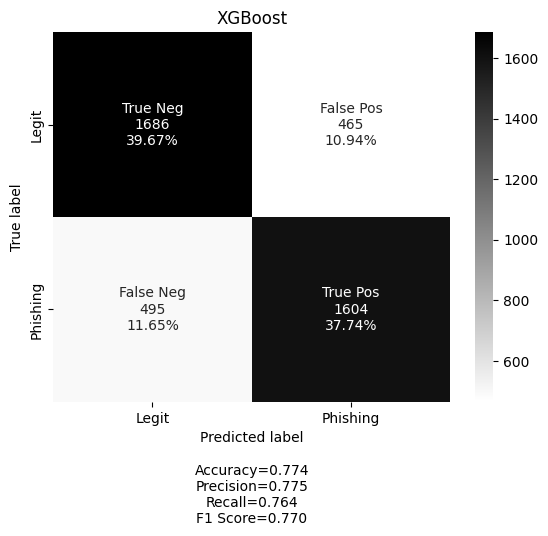

In [22]:
from xgboost import XGBClassifier

xgb = XGBClassifier(learning_rate=0.1,max_depth=15)

perform_model(xgb, 'XGBoost')

Accuracy on test Data: 0.755


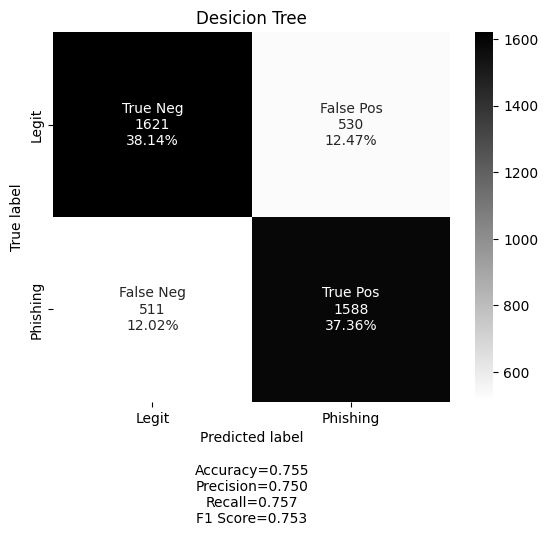

In [23]:
from sklearn.tree import DecisionTreeClassifier

desicion_tree = DecisionTreeClassifier(criterion='entropy', max_depth=11, random_state=0)

perform_model(desicion_tree, 'Desicion Tree')

Accuracy on test Data: 0.775


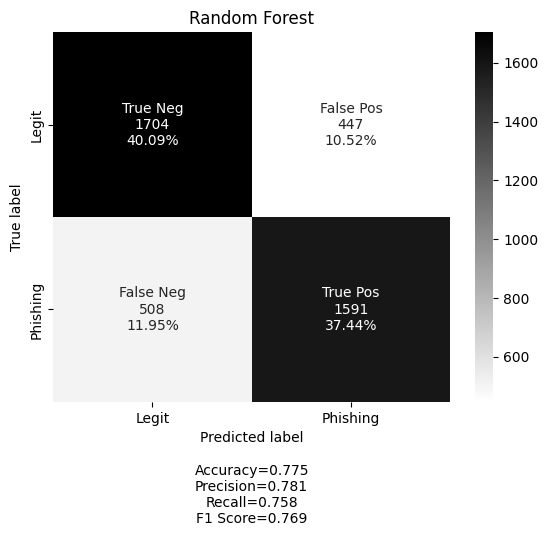

In [24]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=1)

perform_model(random_forest, 'Random Forest')

Iteration 1, loss = 0.70262353
Iteration 2, loss = 0.68464357
Iteration 3, loss = 0.67489436
Iteration 4, loss = 0.66576491
Iteration 5, loss = 0.65657030
Iteration 6, loss = 0.64801963
Iteration 7, loss = 0.63967499
Iteration 8, loss = 0.63126623
Iteration 9, loss = 0.62335147
Iteration 10, loss = 0.61596127
Iteration 11, loss = 0.60908262
Iteration 12, loss = 0.60301826
Iteration 13, loss = 0.59785580
Iteration 14, loss = 0.59288159
Iteration 15, loss = 0.58861075
Iteration 16, loss = 0.58545794
Iteration 17, loss = 0.58224722
Iteration 18, loss = 0.57924519
Iteration 19, loss = 0.57664991
Iteration 20, loss = 0.57438324
Iteration 21, loss = 0.57231959
Iteration 22, loss = 0.57027469
Iteration 23, loss = 0.56882305
Iteration 24, loss = 0.56668470
Iteration 25, loss = 0.56535241
Iteration 26, loss = 0.56372377
Iteration 27, loss = 0.56238975
Iteration 28, loss = 0.56133035
Iteration 29, loss = 0.56045137
Iteration 30, loss = 0.55917666
Iteration 31, loss = 0.55801878
Iteration 32, los

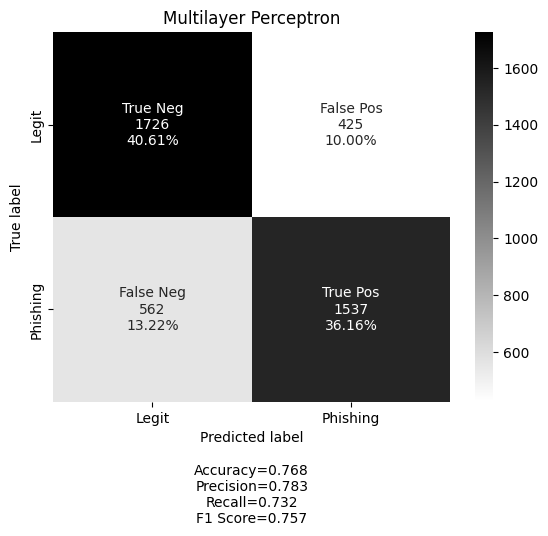

In [26]:
from sklearn.neural_network import MLPClassifier

multilayer_perceptron = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=1000, alpha=0.0001, solver='sgd', verbose=10, random_state=0, tol=0.000000001)

perform_model(multilayer_perceptron, 'Multilayer Perceptron')

Accuracy on test Data: 0.730


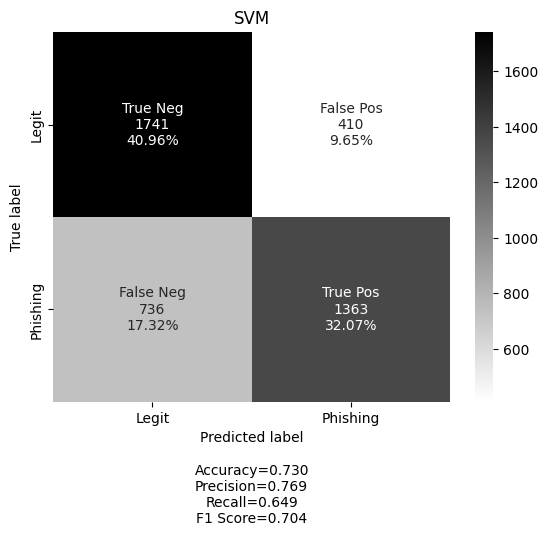

In [27]:
from sklearn.svm import SVC

svm = SVC(kernel='poly', random_state=0, probability=True)

perform_model(svm, 'SVM')

In [29]:
pd.DataFrame({'ML Model': ML_Model, 'Test Accuracy': acc_test}).sort_values(by=['Test Accuracy'], ascending=False) #sort results

,ML Model,Test Accuracy
2,Random Forest,77.53%
0,XGBoost,77.41%
3,Multilayer Perceptron,76.78%
1,Desicion Tree,75.51%
4,SVM,73.04%


In [28]:
import pickle
pickle.dump(xgb, open("XGBoost.pickle.dat", "wb")) #extract the best model